# "Unit 1991" course applicants classification with Decision Tree

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (10.0, 8.0)
 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
 
%load_ext autoreload
%autoreload 2

from src.decision_tree import DTClassifier

This dataset shows whether the applicant has been involved in the Unit 1991 courses.

Columns:
* `Pass` - 1 if has been involved, 0 otherwise
* `Age` - age of the applicant
* `Education type` - educational level of the applicant
* `Educational institution name` - exact place of study
* `Programming languages` - what languages the applicant knows

In [2]:
# Reading data from dataset.csv
df = pd.read_csv("data/raw/applicants.csv")
df

,Pass,Age,Education type,Educational institution name,Programming languages
0,0,19,High school,Other,"Python, Java Script, C++, C, Other"
1,0,18,High school,Eurnekian school,"Python, Java Script"
2,0,17,High school,NPUA,"Python, Other"
3,0,1,Bachelor,Other,No
4,0,23,Master,No,Java Script
...,...,...,...,...,...
402,0,21,Bachelor,RAU,Java
403,0,18,High school,Ayb,"Python, Java Script, C++, Other"
404,0,18,High school,Physmath,Other
405,0,17,High school,Real school,"Python, Java Script"


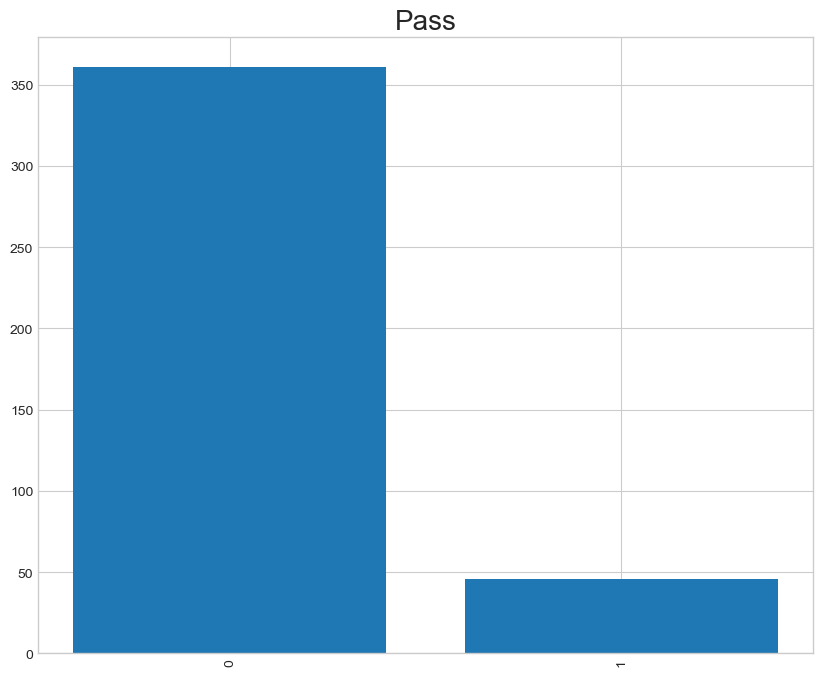

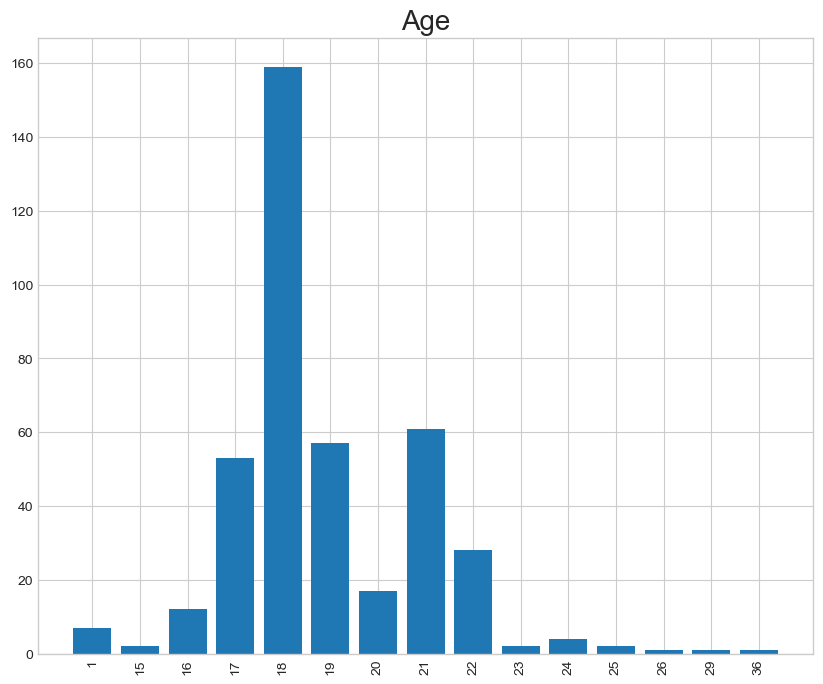

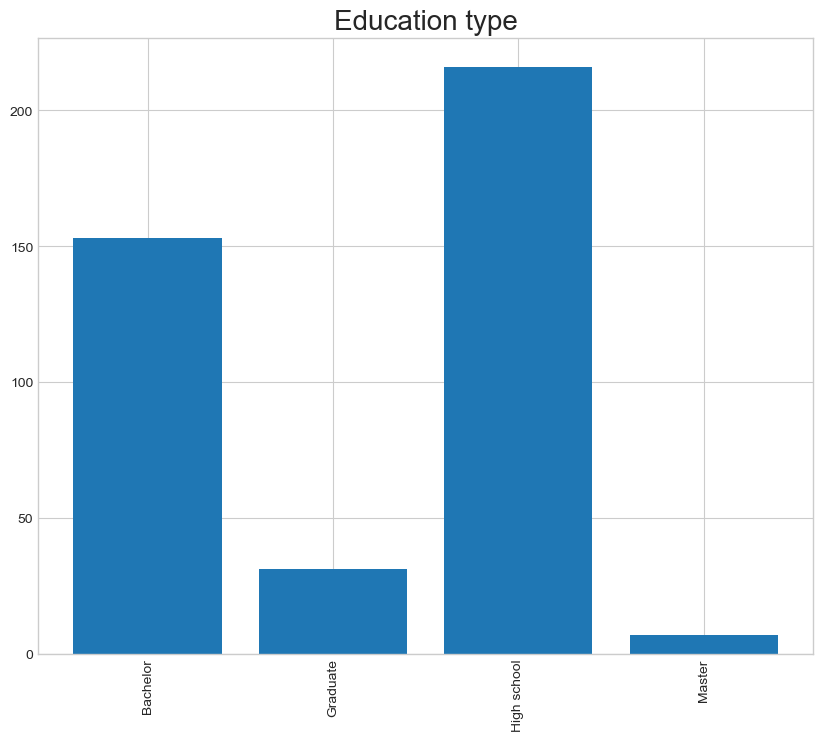

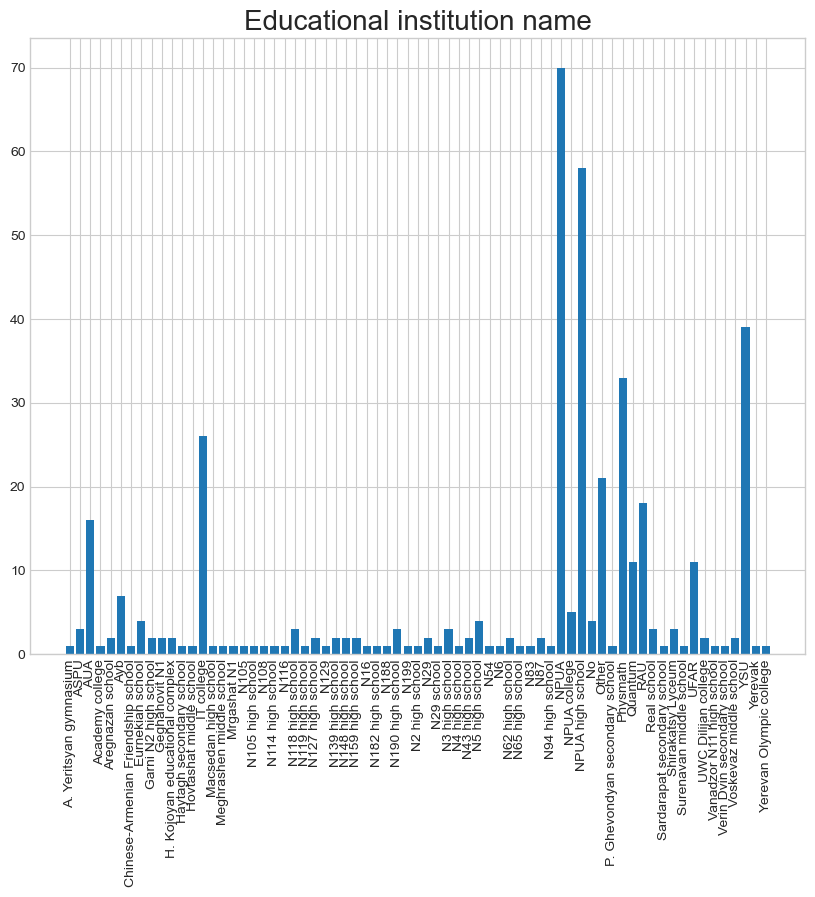

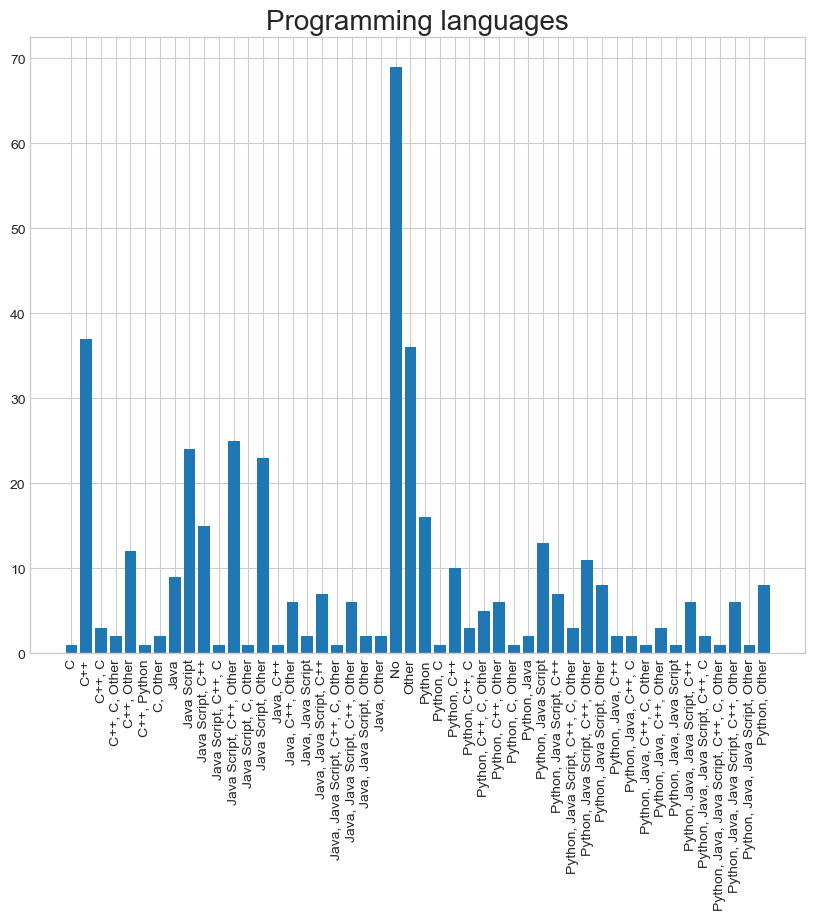

In [4]:
# Write code to see each column distribution
for column in df:
    values, c = np.unique(df[column], return_counts=True)
    values = [str(val).strip() for val in values]
    plt.title(column, fontsize=20)
    plt.bar(values, c)
    plt.xticks(values, rotation=90)
    plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Pass"), df.Pass, random_state=0)

In [6]:
start = time.perf_counter()
model = DTClassifier(impurity="entropy") # or impurity="gini"
model.fit(X_train, y_train)
print("Impurity measure: Entropy") # or Gini index
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model.predict(X_train), y_train))
print("Test accuracy: ", accuracy_score(model.predict(X_test), y_test))

Impurity measure: Entropy
Time taken: 0.6371174000000224 sec
Train accuracy:  0.9770491803278688
Test accuracy:  0.8725490196078431


The accuracy should be about $87.25\%$ in both cases.
Compare with Sklearn's implementation.

In [7]:
# Change `df` so the error in cell below will be fixed
# 1-hot encoding
df = pd.get_dummies(df, columns=["Education type", "Educational institution name", "Programming languages"], drop_first=True)

In [8]:
# This will show error, fix it in cell above
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Pass"), df.Pass, random_state=0)

model = DecisionTreeClassifier()
start = time.perf_counter()
model.fit(X_train, y_train)
print(f"Time taken: {time.perf_counter()-start} sec")
print("Train accuracy: ", accuracy_score(model.predict(X_train), y_train))
print("Test accuracy: ", accuracy_score(model.predict(X_test), y_test))

Time taken: 0.019455600000014783 sec
Train accuracy:  0.9770491803278688
Test accuracy:  0.8823529411764706


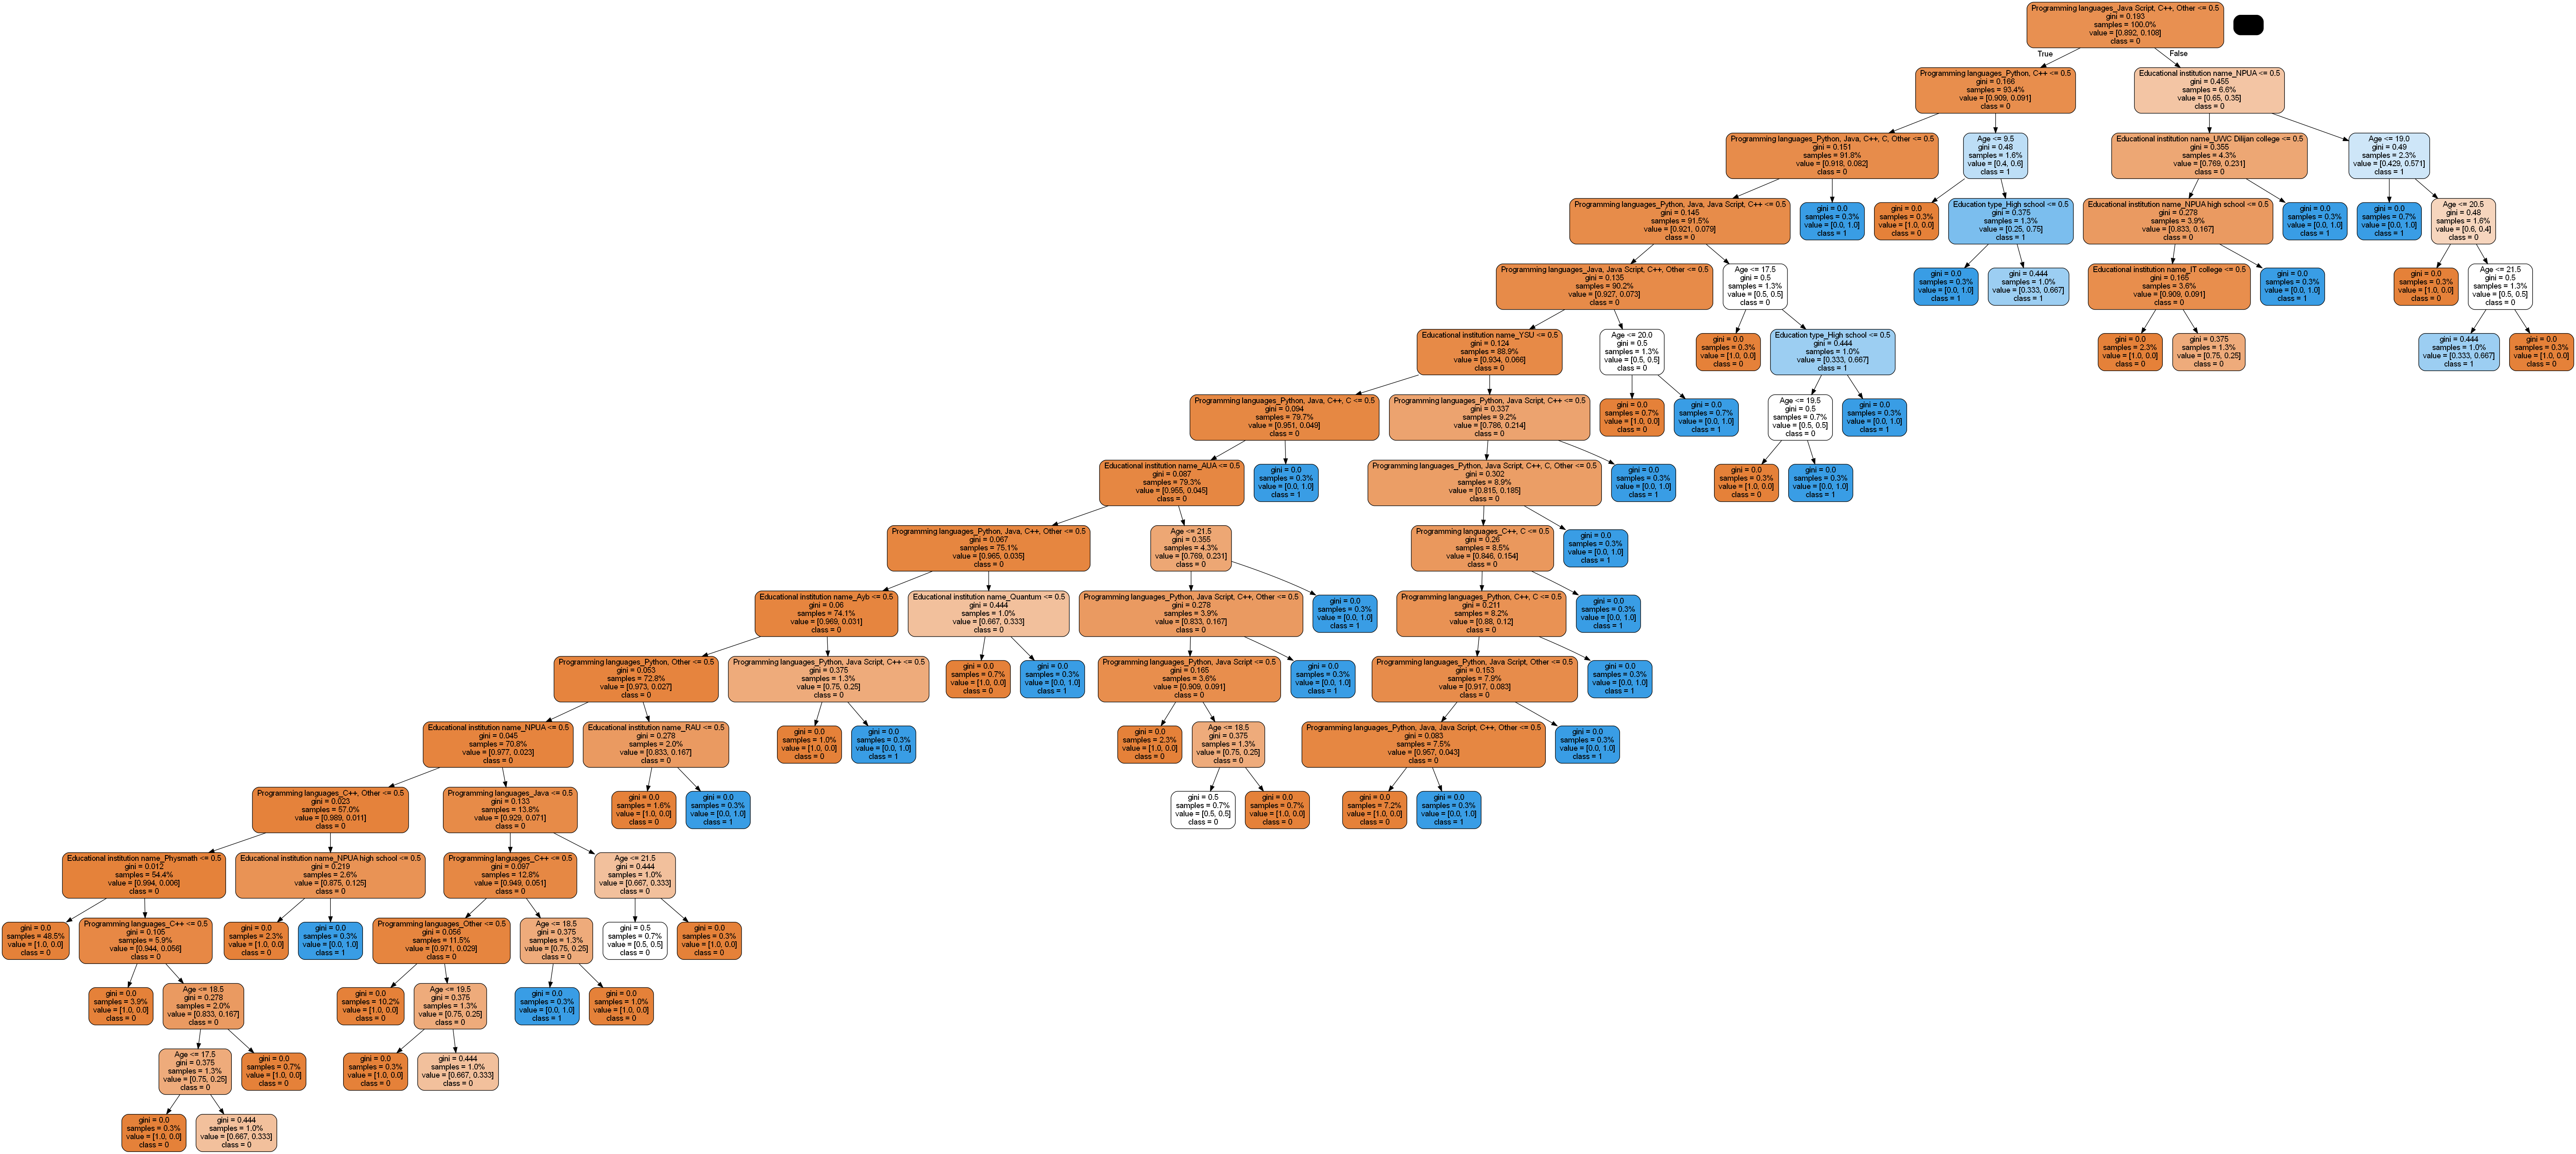

In [9]:
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns,  
                          class_names=y_train.unique().astype(str), filled=True, 
                           rounded=True, proportion=True, special_characters=False) 

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [10]:
# To modify the dataset so that it depends on each programming language separately:
df = pd.read_csv("data/raw/applicants.csv")
df = pd.get_dummies(df, columns=["Education type", "Educational institution name"], drop_first=True) # 1-hot encoding
df["Programming languages"] = df["Programming languages"].str.split(", ")
unique_languages = set()
for languages in df["Programming languages"]:
    for language in languages:
        unique_languages.add(language)
        df[f"Programming languages_{language}"] = 1
df.drop(columns="Programming languages", inplace=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Pass"), df.Pass, random_state=0)

In [12]:
# Custom DT implementation
start = time.perf_counter()
model = DTClassifier(impurity="entropy") # or impurity="gini"
model.fit(X_train, y_train)
print("Impurity measure: Entropy") # or Gini index
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model.predict(X_train), y_train))
print("Test accuracy: ", accuracy_score(model.predict(X_test), y_test))

Impurity measure: Entropy
Time taken: 0.3960571999999729 sec
Train accuracy:  0.9081967213114754
Test accuracy:  0.8627450980392157


In [13]:
# Sklearn's implementation
start = time.perf_counter()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model.predict(X_train), y_train))
print("Test accuracy: ", accuracy_score(model.predict(X_test), y_test))

Time taken: 0.007219500000019252 sec
Train accuracy:  0.9081967213114754
Test accuracy:  0.8627450980392157


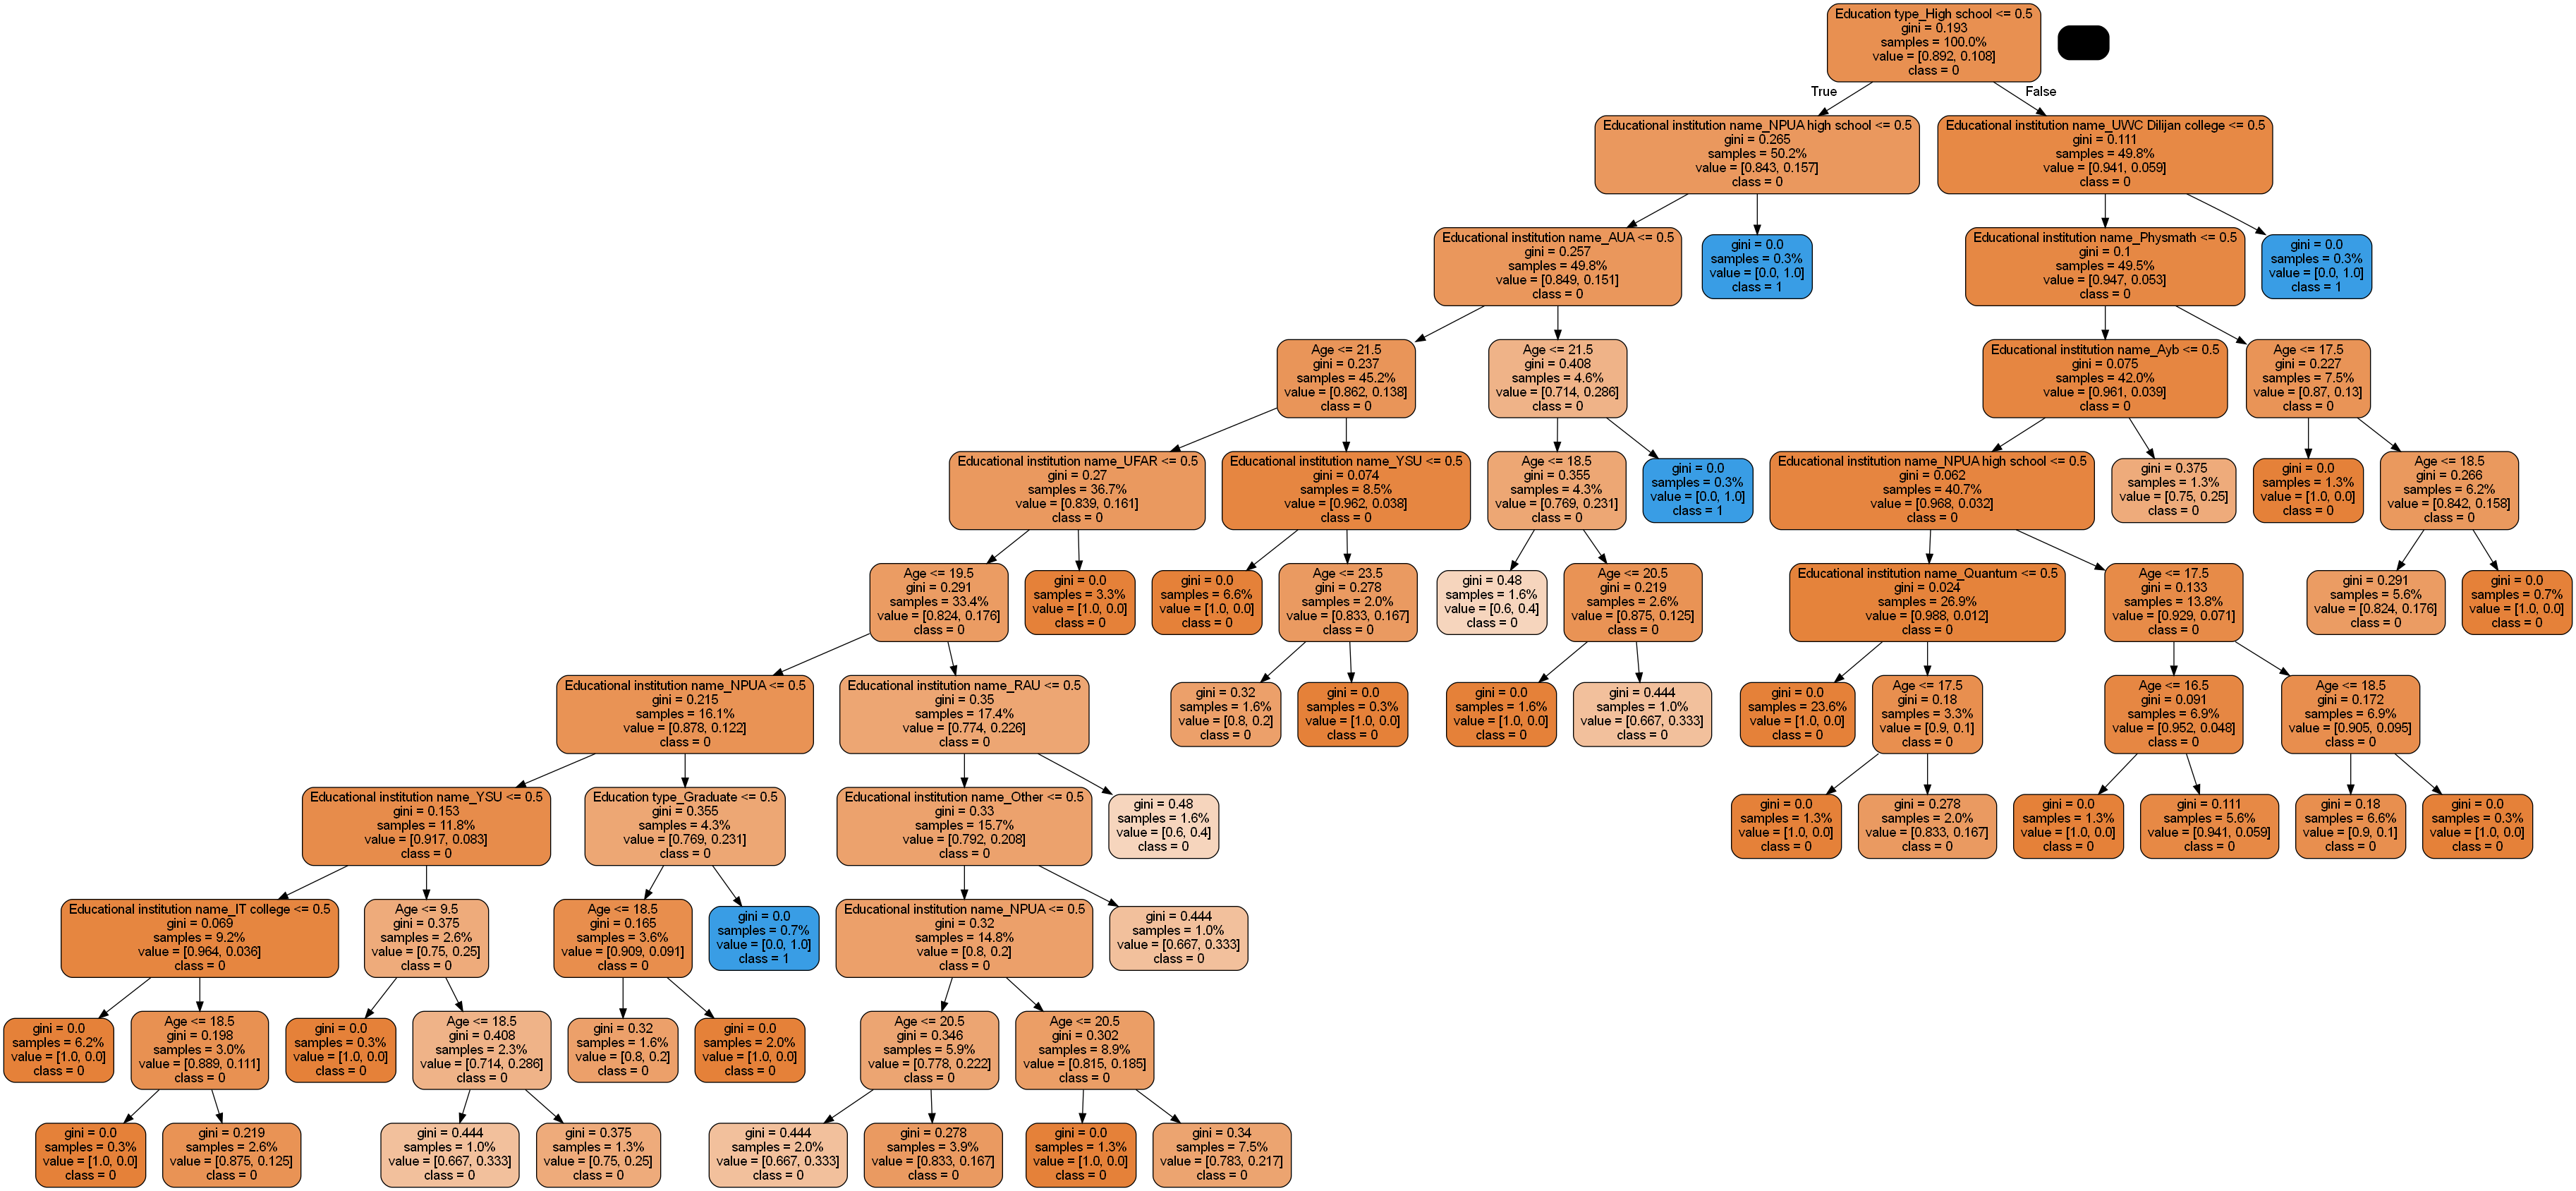

In [14]:
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns,  
                          class_names=y_train.unique().astype(str), filled=True, 
                           rounded=True, proportion=True, special_characters=False) 

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

Try to get better accuracy by changing classifier parameters

In [15]:
params = {
  "impurity": "gini",
  "max_depth" : 4 
}

In [16]:
# Custom DT implementation
model = DTClassifier(**params)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(prediction, y_test)

0.8627450980392157

In [17]:
params = {
  "criterion": "gini",
  "max_depth" : 4
}

In [18]:
# Sklearn's implementation
model = DecisionTreeClassifier(**params)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(prediction, y_test)

0.8627450980392157